# Aula 4.3. Coleta de dados no Twitter: Exemplo utilizando a linguagem R

### UTILIZANDO APIS DE TERCEIROS

In [7]:
# testando api 

# initialize TwitterAPI and necessary keys and tokens
CONSUMER_KEY = 'fzrSWX4oRD0OEOFnKQYDGfPSD' 
CONSUMER_SECRET = 'vV9gU8RT8cLNnufsg36CVYl7Qy40WlcHOgtbza3Chlxd48yTZp'
ACCESS_TOKEN_KEY = '891155597344813056-11oAOCuIQxNDhR7sWhb42th35h30XHr'
ACCESS_TOKEN_SECRET = 'u3SH0UvczuBxgPas5P1ghWivJm7hVsq2eZV5hhKnCwpCu'


### INSTALANDO/IMPORTANDO MONGO

In [8]:
# eu
#install.packages("mongolite")
print('Instalação concluída!')

# eu
# library(mongolite)

# professora
require(mongolite)
print('Biblioteca importada!')

[1] "Instalação concluída!"
[1] "Biblioteca importada!"


### INSTALANDO/IMPORTANDO PACKAGES "twitteR" ou "rtweet"

In [9]:
# install

install.packages('rtweet')

print('rtweet instalado!')

Warning message:
"package 'rtweet' is in use and will not be installed"

[1] "rtweet instalado!"


In [33]:
# lendo a bilbioteca rtweet

require(rtweet)
require(maps) ################################################## maps

print('Biblioteca instalada!')

[1] "Biblioteca instalada!"


In [68]:
# autenticação 

token <- create_token(app = 'exemplo IGTI',CONSUMER_KEY,CONSUMER_SECRET,ACCESS_TOKEN_KEY,ACCESS_TOKEN_SECRET)

In [69]:
# setar o diretorio de trabalho

#setwd("E:\\MEUS DOCUMENTOS\\001 Estudo\\IGTI - BOOTCAMP\\desafio2\\arquivos")

In [70]:
# Parametros para busca

screen_name <- "Jairbolsonaro"

In [71]:
# Buscando 100 tweets

tweets <- get_timeline(screen_name, n=100, include_rts=TRUE, exclude_replies=TRUE) #### GET_TIMELINE é do pacote rtweet?

In [72]:
# salvando o vetor de tweets como csv e apenas o texto em txt na codificação do portugues

path <- 'E:/MEUS DOCUMENTOS/001 Estudo/IGTI - BOOTCAMP/desafio2/arquivos/TweetsByNameRawData.csv'

write_as_csv(tweets, path, fileEncoding = "latin1//TRANSLIT")  ######### ACENTUAÇÃO PERFEITA!!!!!!!!!!!!

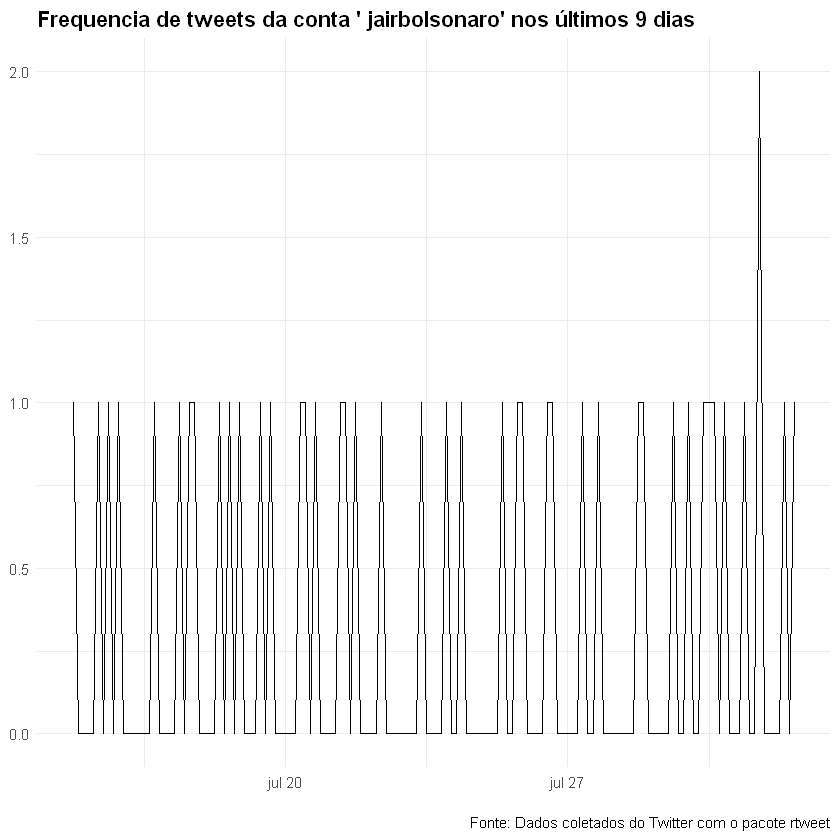

In [73]:
# PLOTA A SÉRIE TEMPORAL DOS TWEETS

ts_plot(tweets, '3 hours') +
    ggplot2::theme_minimal() +
    ggplot2::theme(plot.title = ggplot2::element_text (face = "bold")) +
    ggplot2::labs (
        x = NULL, y = NULL,
        title = "Frequencia de tweets da conta ' jairbolsonaro' nos últimos 9 dias",
        subtilte = "Contagem de tweets agregados em intervalos de 3 horas",
        caption = "\nFonte: Dados coletados do Twitter com o pacote rtweet"
    )

### OUTRO EXEMPLO

In [120]:
# PARAMETROS DE BUSCA

search.string <- c("#corona OR #coronavirus OR #covid OR '#covid-19' OR #covid19 OR #ficaemcasa")

In [121]:
type = "mixed"   ########### recent, mixed, popular

In [122]:
# Buscando ################# se colocar retryonratelimit = TRUE, ele vai alem de N... mais de 18 mil tweets

#tweets <- search_tweets(search.string, n=50, lang="pt", type=type, include_rts=FALSE, retryonratelimit=TRUE)

tweets <- search_tweets(search.string, n=2000, lang="pt", type=type, include_rts=FALSE, retryonratelimit=FALSE) 

In [123]:

setwd("E:/MEUS DOCUMENTOS/001 Estudo/IGTI - BOOTCAMP/desafio2/arquivos")

# salvar o vetor de tweets com csv e apenas o Texto em TXT na codificação do portugues

# salvando o vetor de tweets como csv e apenas o texto em txt na codificação do portugues

#path <- 'E:/MEUS DOCUMENTOS/001 Estudo/IGTI - BOOTCAMP/desafio2/arquivos/TweetsByNameRawDataCorona.csv'

write_as_csv(tweets, "TweetsRawData.csv", fileEncoding = "latin1//TRANSLIT")  ######### ACENTUAÇÃO PERFEITA!!!!!!!!!!!!

write.table(tweets$text, "TweetsRawData.txt", fileEncoding = "latin1//TRANSLIT")


In [124]:
tweets <- lat_lng(tweets)   ##### cria lat/lang variaveis usando todos os tweets disponiveis

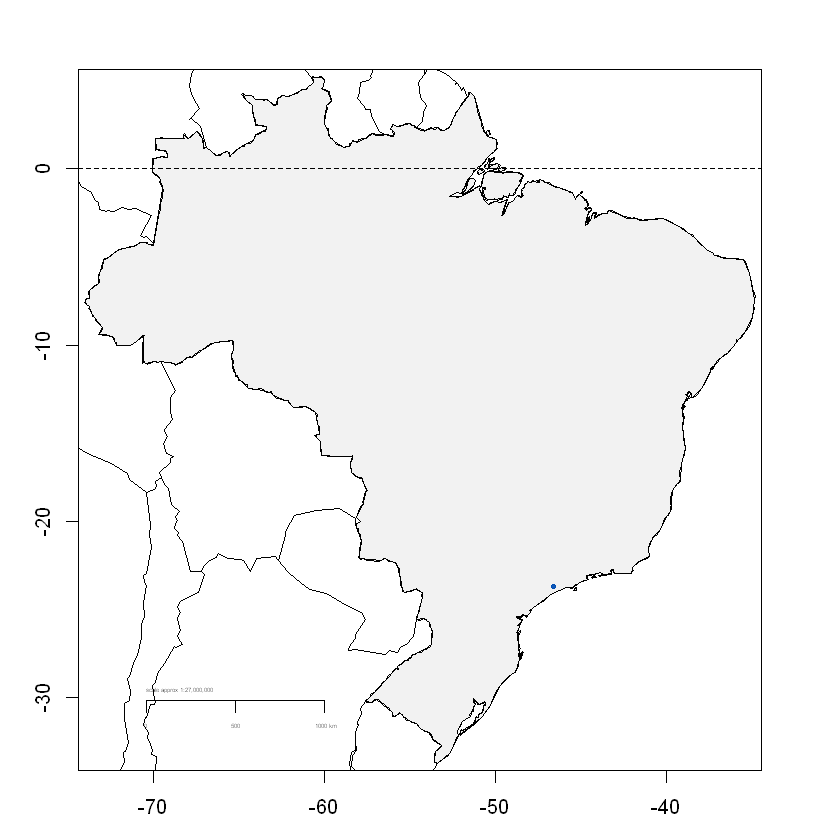

In [125]:
# plota o mapa do brasil

par(mar=c(0,0,0,0)) ########## função que define ou ajusta os parametros de plotagem ajusta as margens
map("world","brazil",lwd=0.3, fill=T,col="grey95")
map(,,add=T)
map.axes()
map.scale(ratio=T,cex=0.3)
abline(h=0,lty=2)
map.cities(country='Brazil', minpop=200000000, pch=15, cex=0.9)  ###### pacote maps

with(tweets_corona, points(lng,lat,pch=20,cex=.75,col=rgb(0,.3,.7,.75)))


In [126]:
type(tweet)

ERROR: Error in type(tweet): não foi possível encontrar a função "type"


In [115]:
tweets

user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,lat,lng
8802752,1289180259418542080,2020-07-31 12:45:00,g1,#Coronavírus - Por que os casos de Covid-19 voltaram a crescer no Brasil? Veja 3 motivos https://t.co/8NylcMATCM #G1 https://t.co/f0IdNphpU5,TweetDeck,116,NA,NA,NA,...,2007-09-11 04:05:49,TRUE,http://t.co/f4ZCAE4llQ,http://g1.com.br,NA,https://pbs.twimg.com/profile_banners/8802752/1594149101,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/895772431457157121/n8bWszjh_normal.jpg,NA,NA
37717107,1289621921202503681,2020-08-01 18:00:00,minsaude,"Apoio à linha de frente! Profissionais de saúde do SUS envolvidos no combate à #COVID19 que se sentirem na condição de sofrimento psíquico podem utilizar o #Telepsi, pelo nº 0800 644 6543, opção 4. Saiba mais: https://t.co/kSYoiKl8nb #Coronavírus https://t.co/rgngUKzUa6",Twitter Media Studio,246,NA,NA,NA,...,2009-05-04 18:11:59,TRUE,https://t.co/BbtNTX5xFm,http://www.blog.saude.gov.br,NA,https://pbs.twimg.com/profile_banners/37717107/1589733010,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1262057826341568513/EQmvQLDR_normal.jpg,NA,NA
18912498,1289323653834764288,2020-07-31 22:14:48,tvbrasilgov,#coronavírus <U+0001F637> O Brasil tem 1.844.051 pacientes curados de #Covid19. O @minsaude confirmou 2.662.485 casos e 92.475 óbitos provocados pela doença: https://t.co/2Tjkf9hUsq,Twitter Web App,146,NA,NA,NA,...,2009-01-12 19:48:35,TRUE,NA,NA,NA,https://pbs.twimg.com/profile_banners/18912498/1594051214,http://abs.twimg.com/images/themes/theme16/bg.gif,http://pbs.twimg.com/profile_images/1280169687507140610/RYcoHaJs_normal.jpg,NA,NA
18912498,1289682971549528065,2020-08-01 22:02:36,tvbrasilgov,"#coronavírus <U+0001F637> | @minsaude confirma 2.707.877 casos de #covid19 no país. Desde o início da pandemia, já são 1.865.729 pacientes recuperados e 93.563 óbitos registrados em decorrência da doença. https://t.co/DBEMNZ91vL",TweetDeck,195,NA,NA,NA,...,2009-01-12 19:48:35,TRUE,NA,NA,NA,https://pbs.twimg.com/profile_banners/18912498/1594051214,http://abs.twimg.com/images/themes/theme16/bg.gif,http://pbs.twimg.com/profile_images/1280169687507140610/RYcoHaJs_normal.jpg,NA,NA
66867484,1289690575512276992,2020-08-01 22:32:49,dcvitti,Dados do avanço sobre o novo #coronavírus #COVID19 pelo mundo em #17deJulho <U+0001F30D> <U+2623><U+FE0F> 14.179.750 casos <U+2620><U+FE0F> 598.537 mortes <U+0001F4F6> 8.448.879 recuperados <U+0001F1FA><U+0001F1F8> 3.770.012 <U+0001F1E7><U+0001F1F7> 2.048.697 https://t.co/eI7ky90sqf,Twitter Web App,191,NA,NA,NA,...,2009-08-19 01:25:05,FALSE,https://t.co/3he4UGL4iy,http://www.dcvitti.com,NA,https://pbs.twimg.com/profile_banners/66867484/1536641114,http://abs.twimg.com/images/themes/theme14/bg.gif,http://pbs.twimg.com/profile_images/1214391496008511497/h09HtN4e_normal.jpg,NA,NA
66867484,1289687757363638272,2020-08-01 22:21:37,dcvitti,Dados do avanço sobre o novo #coronavírus #COVID19 pelo mundo em #12deJulho <U+0001F30D> <U+2623><U+FE0F> 13.028.182 casos <U+2620><U+FE0F> 571.080 mortes <U+0001F4F6> 7.575.523 recuperados <U+0001F1FA><U+0001F1F8> 3.413.995 <U+0001F1E7><U+0001F1F7> 1.866.176 https://t.co/eI7ky90sqf,Twitter Web App,191,NA,NA,NA,...,2009-08-19 01:25:05,FALSE,https://t.co/3he4UGL4iy,http://www.dcvitti.com,NA,https://pbs.twimg.com/profile_banners/66867484/1536641114,http://abs.twimg.com/images/themes/theme14/bg.gif,http://pbs.twimg.com/profile_images/1214391496008511497/h09HtN4e_normal.jpg,NA,NA
66867484,1289686351416197120,2020-08-01 22:16:02,dcvitti,Dados do avanço sobre o novo #coronavírus #COVID19 pelo mundo em #7deJulho <U+0001F30D> <U+2623><U+FE0F> 11.941.783 casos <U+2620><U+FE0F> 545.652 mortes <U+0001F4F6> 6.844.973 recuperados <U+0001F1FA><U+0001F1F8> 3.097.084 <U+0001F